In [2]:
import numpy as np
import pandas as pd
from ase.io import read, write
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import seaborn as sns
from scipy.stats import kstest


plt.rc('font', family="sans-serif", weight="bold")          # controls default text sizes
plt.rc('axes', labelsize=15, titlesize=15)    # x and y axes
plt.rc('xtick', labelsize=15)    # Major Ticks
plt.rc('ytick', labelsize=15)    # Major Ticks
plt.rc('xtick.minor', visible=True)    # Minor Ticks
plt.rc('ytick.minor', visible=True)    # Minor Ticks
plt.rc('legend', fontsize=10)    # Legend
plt.rc('figure', titlesize=10)  # Figure title


plt.rcParams['figure.dpi'] = 300
print(plt.rcParams['font.family'])

['sans-serif']


# Load data

In [3]:
mol_single = read("Data\EtOH_moldyn_single.xyz", index=":")
mol_for = read("Data\EtOH_moldyn_for.xyz", index=":")



['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']


In [4]:
def compare_KS(ref, test):
    return kstest(ref, test)

def compare_chi2(ref, test):
    return


TypeError: '<' not supported between instances of 'Atom' and 'Atom'

# Angles

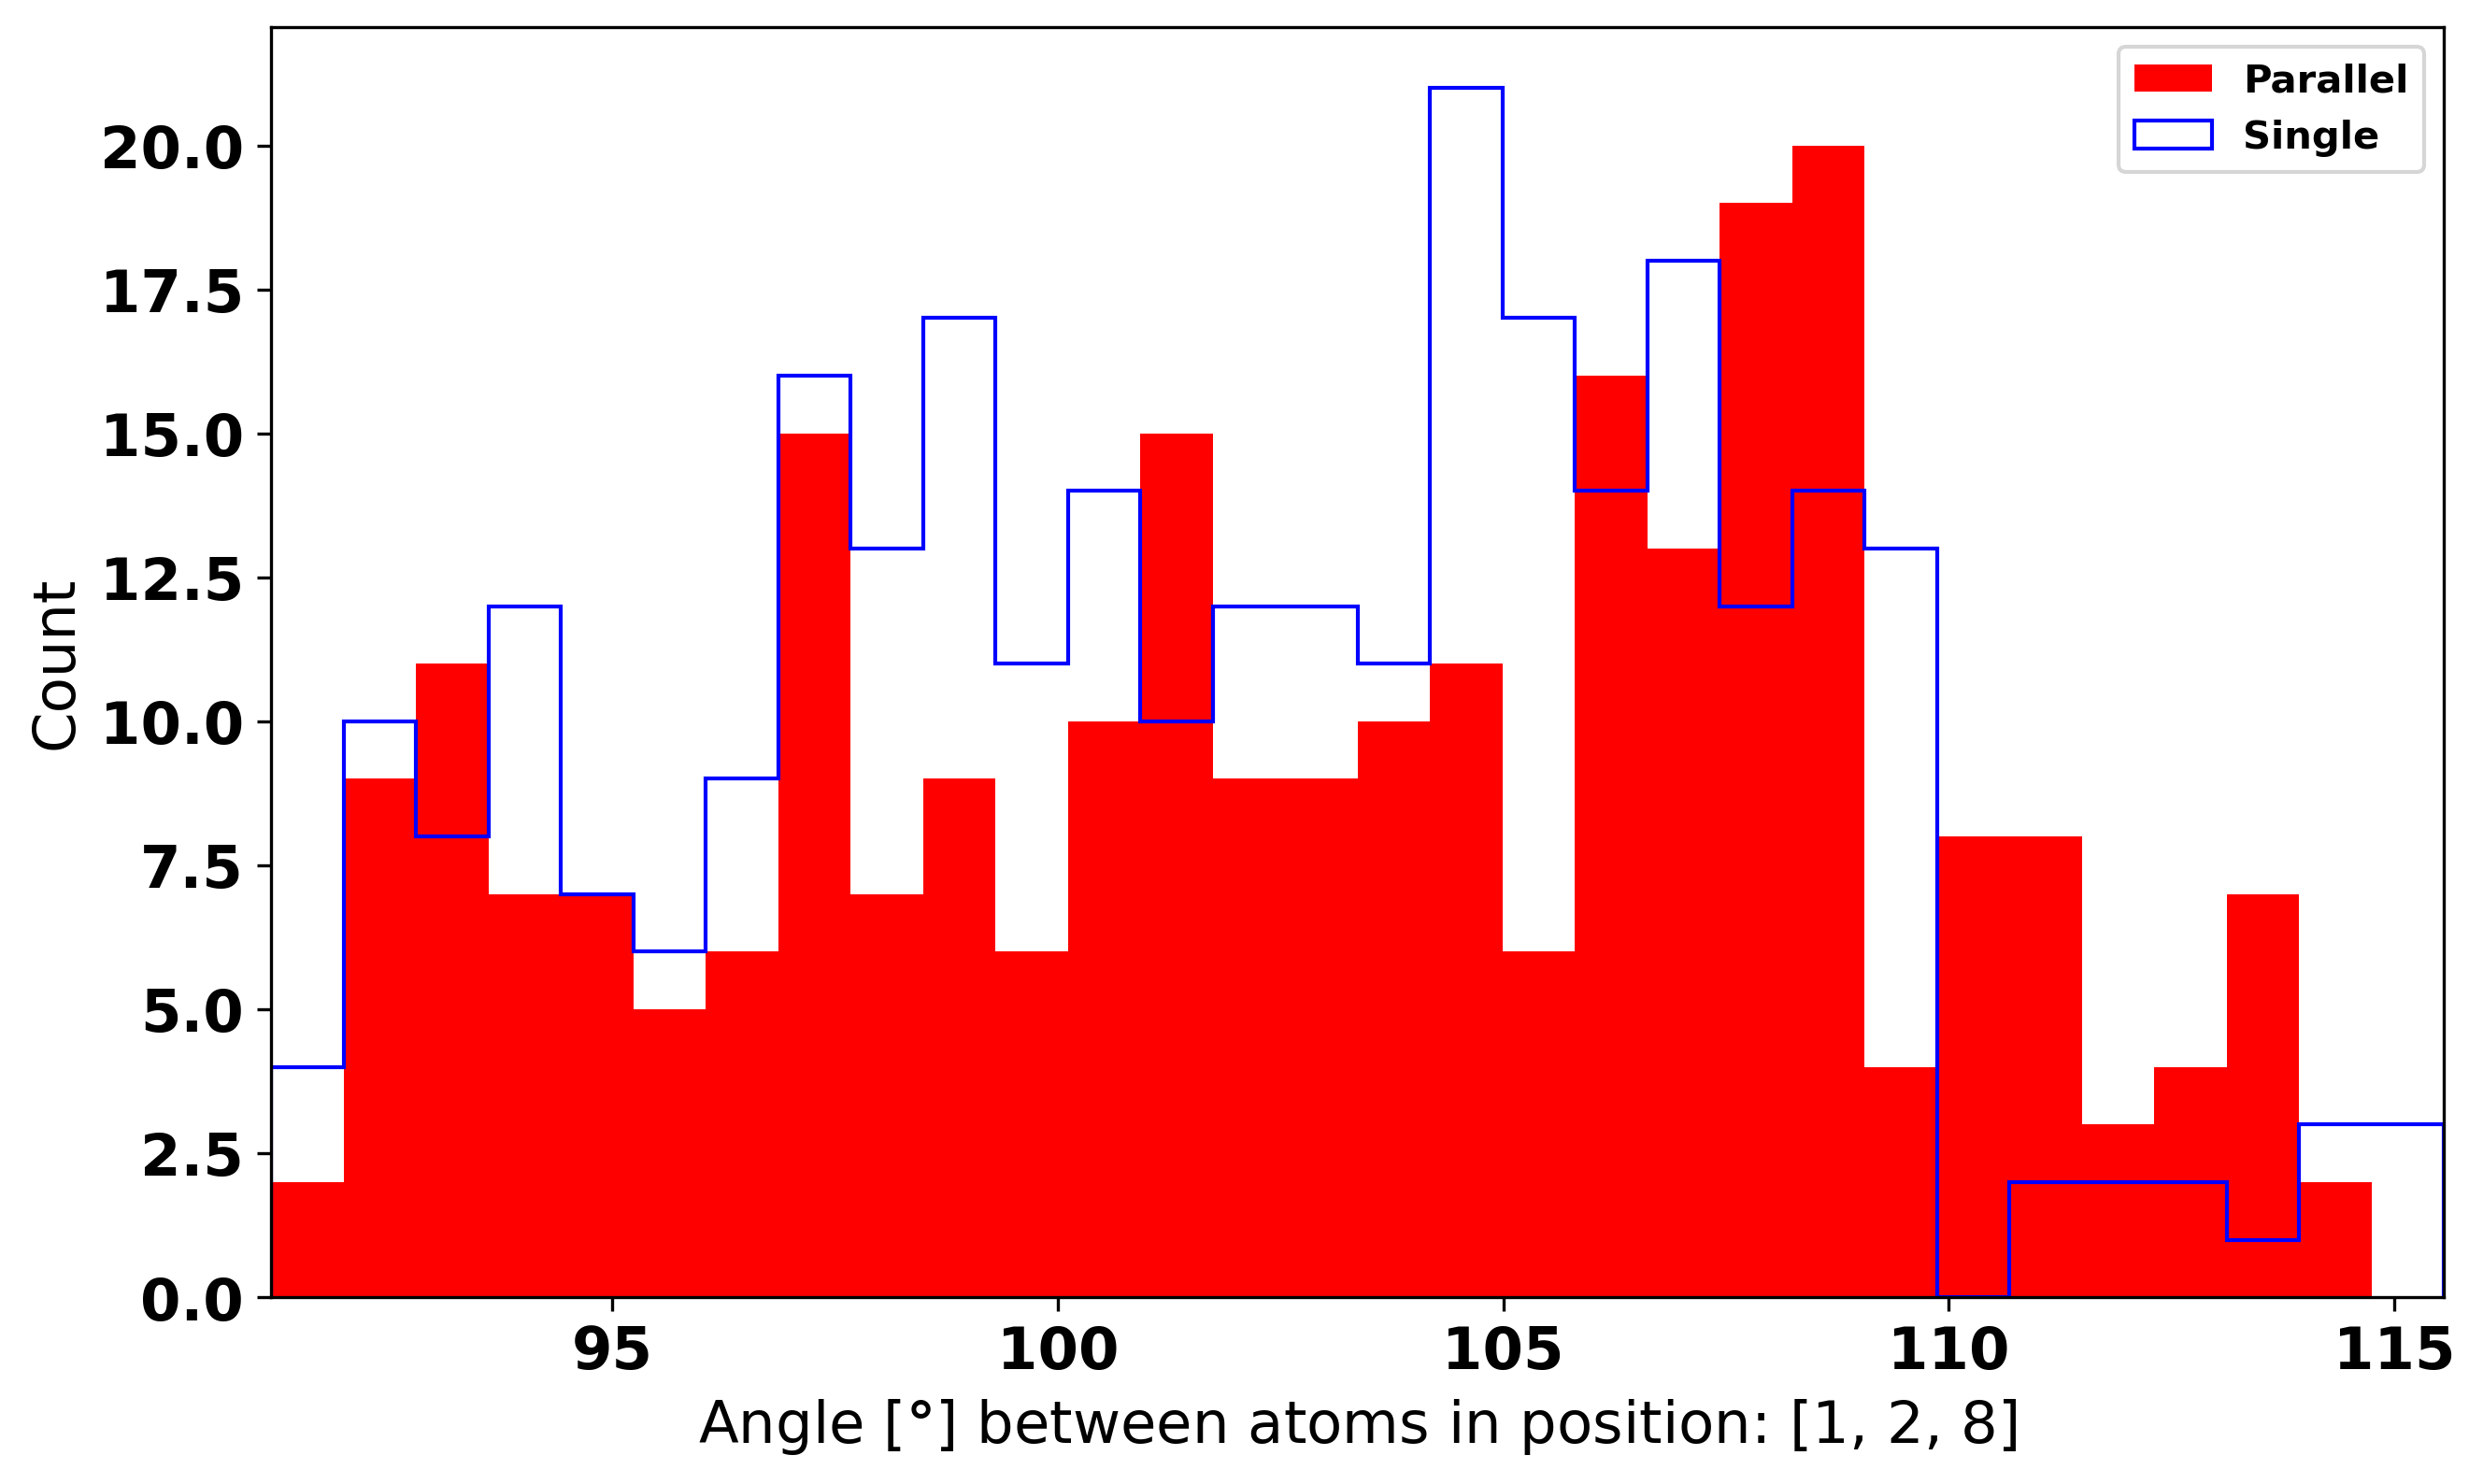

In [5]:
def get_angles(mol, a1, a2, a3):
    angles = []
    for atom in mol:
        angles.append(atom.get_angle(a1, a2, a3))
    return angles

N_bins = 30
indices = [1, 2, 8]
range = (min(get_angles(mol_single, *indices))-0.5, max(get_angles(mol_single, *indices))-0.5)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(get_angles(mol_for, *indices), bins=N_bins, range=range, label="Parallel", histtype="stepfilled", color="r")
ax.hist(get_angles(mol_single, *indices), bins=N_bins, range=range, label="Single", histtype="step", color="b")
ax.set_xlim(range)
ax.set_xlabel("Angle [$\degree$] between atoms in position: "+str(indices))
ax.set_ylabel("Count")
plt.minorticks_off()
plt.legend()
plt.show()


In [6]:
print(compare_KS(get_angles(mol_single, *indices), get_angles(mol_for, *indices)))

KstestResult(statistic=0.11733111849390919, pvalue=0.02979453403890331)


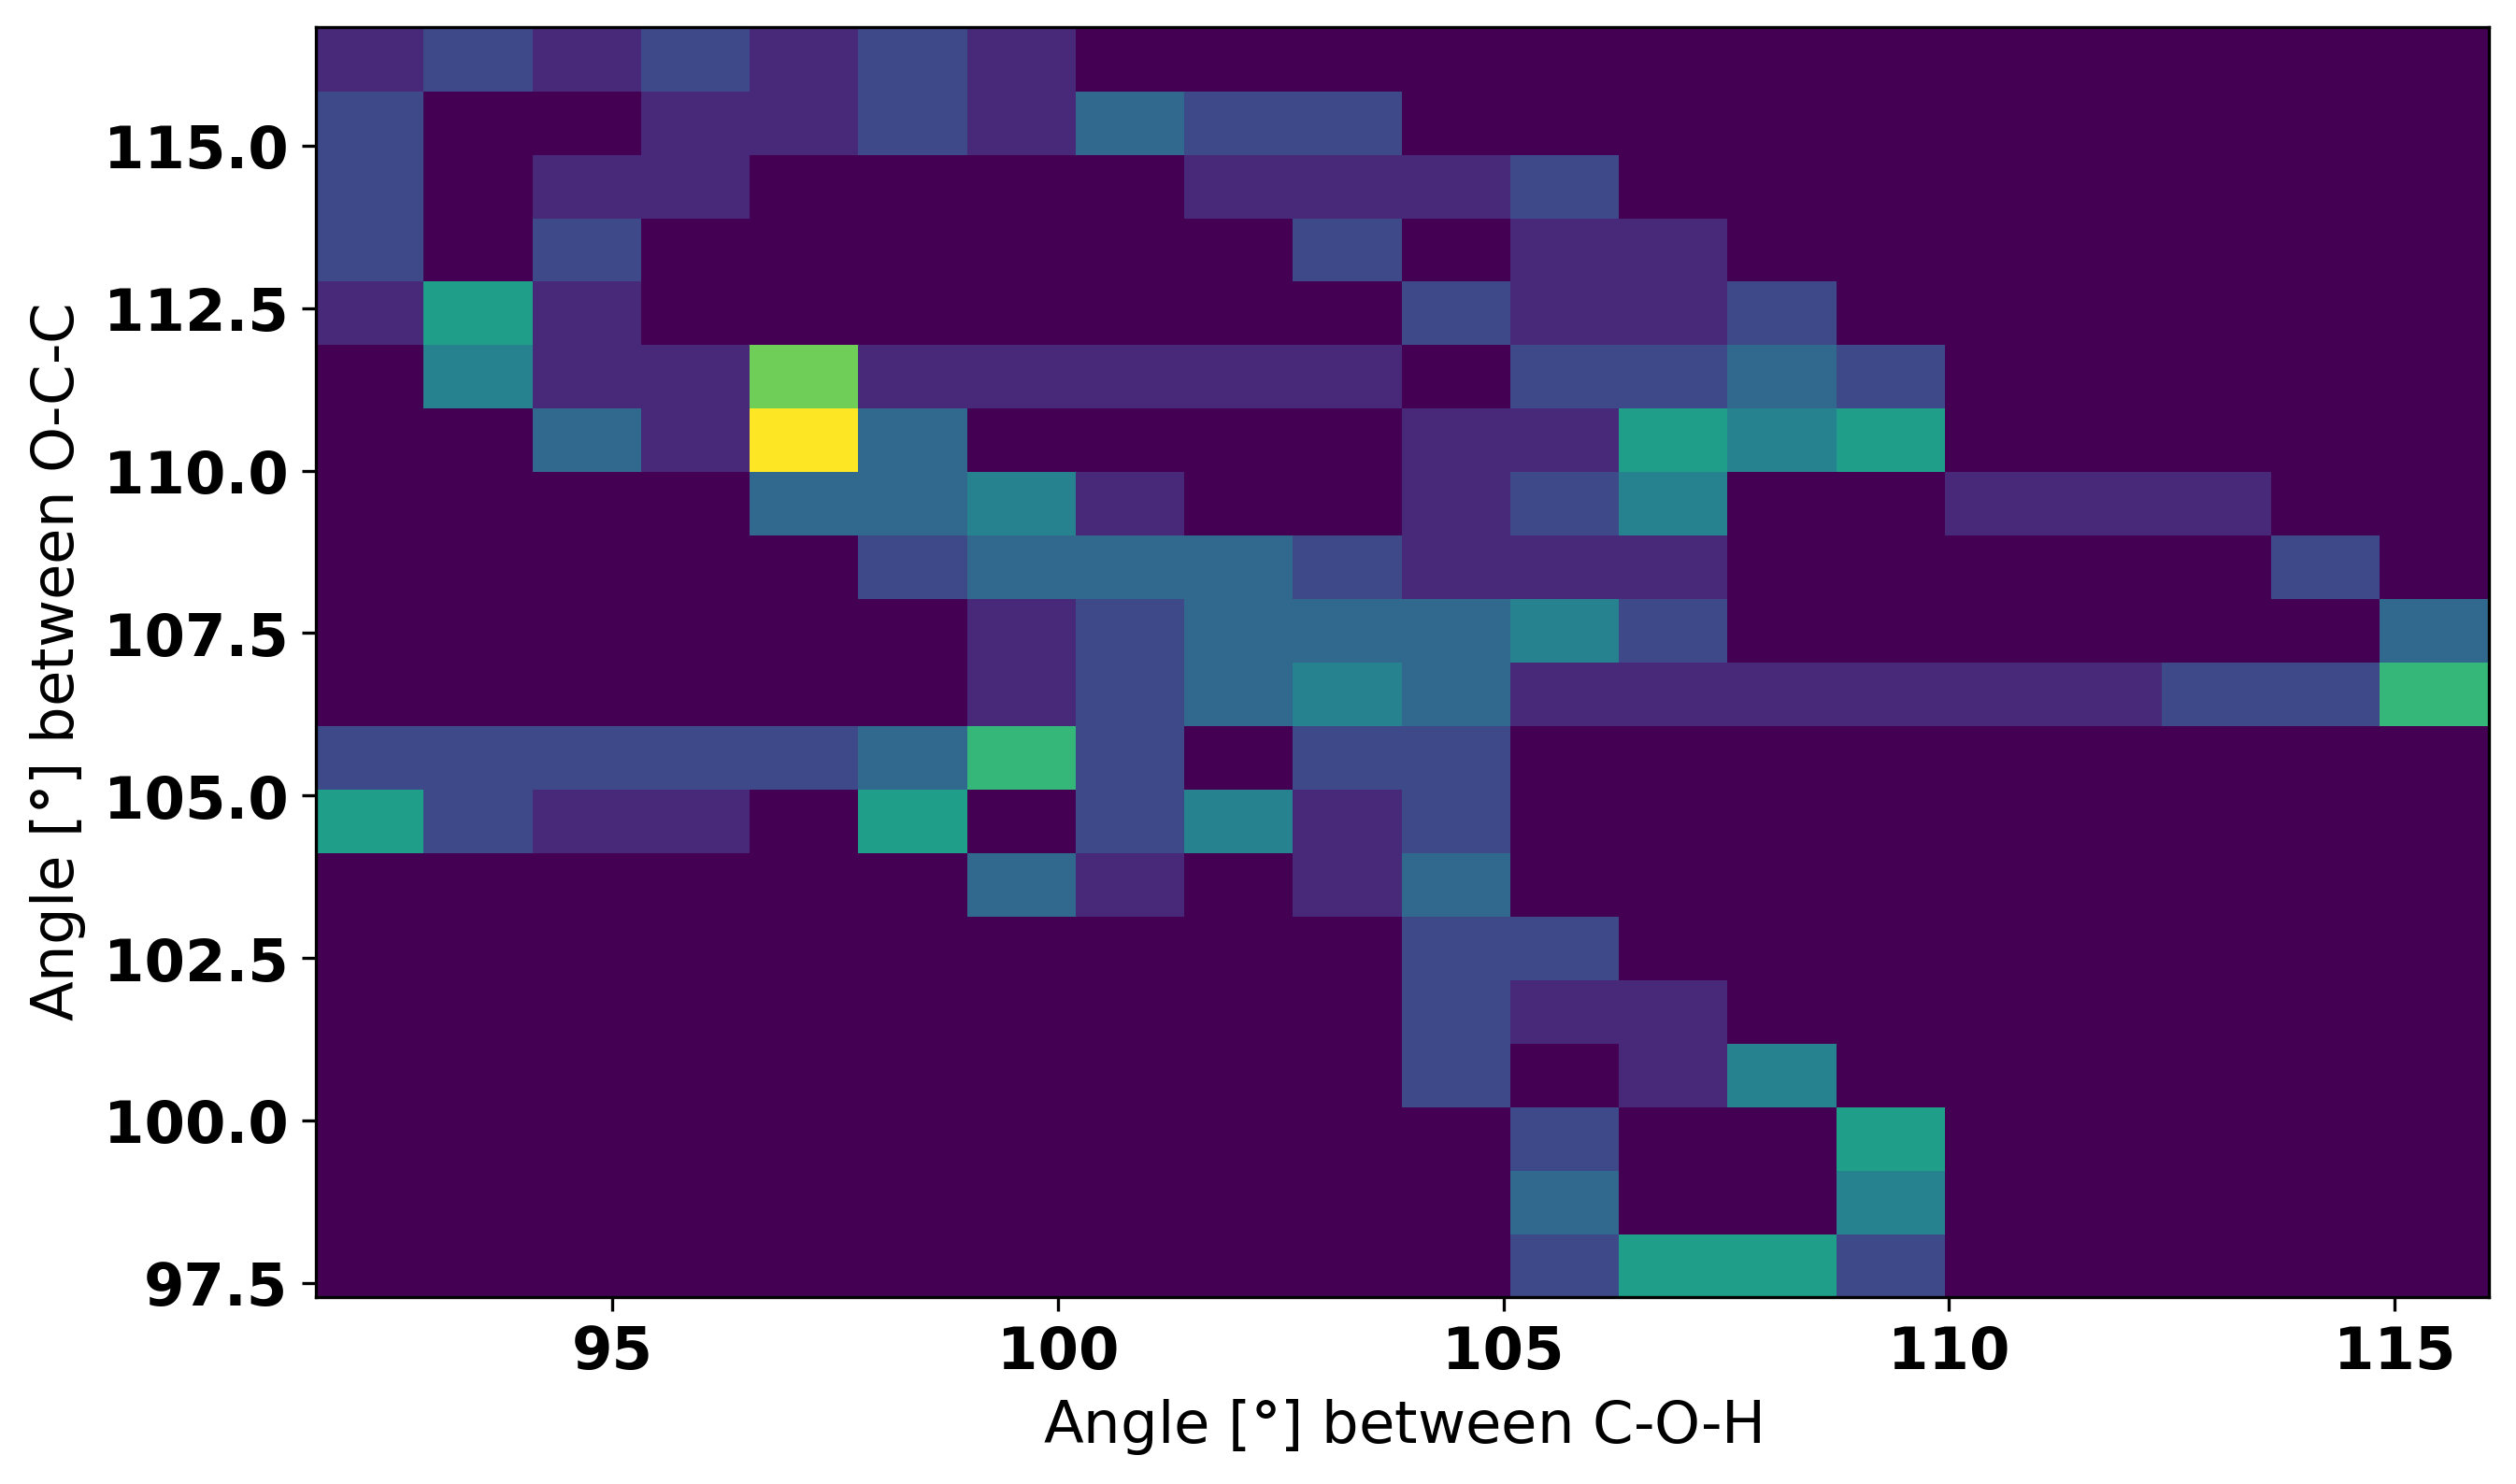

In [29]:
angle1 = get_angles(mol_single, *indices)
angle2 = get_angles(mol_single, 0, 1, 2)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist2d(angle1, angle2, bins=20)
ax.set_xlabel("Angle [$\degree$] between C-O-H")
ax.set_ylabel("Angle [$\degree$] between O-C-C")
plt.minorticks_off()
plt.show()

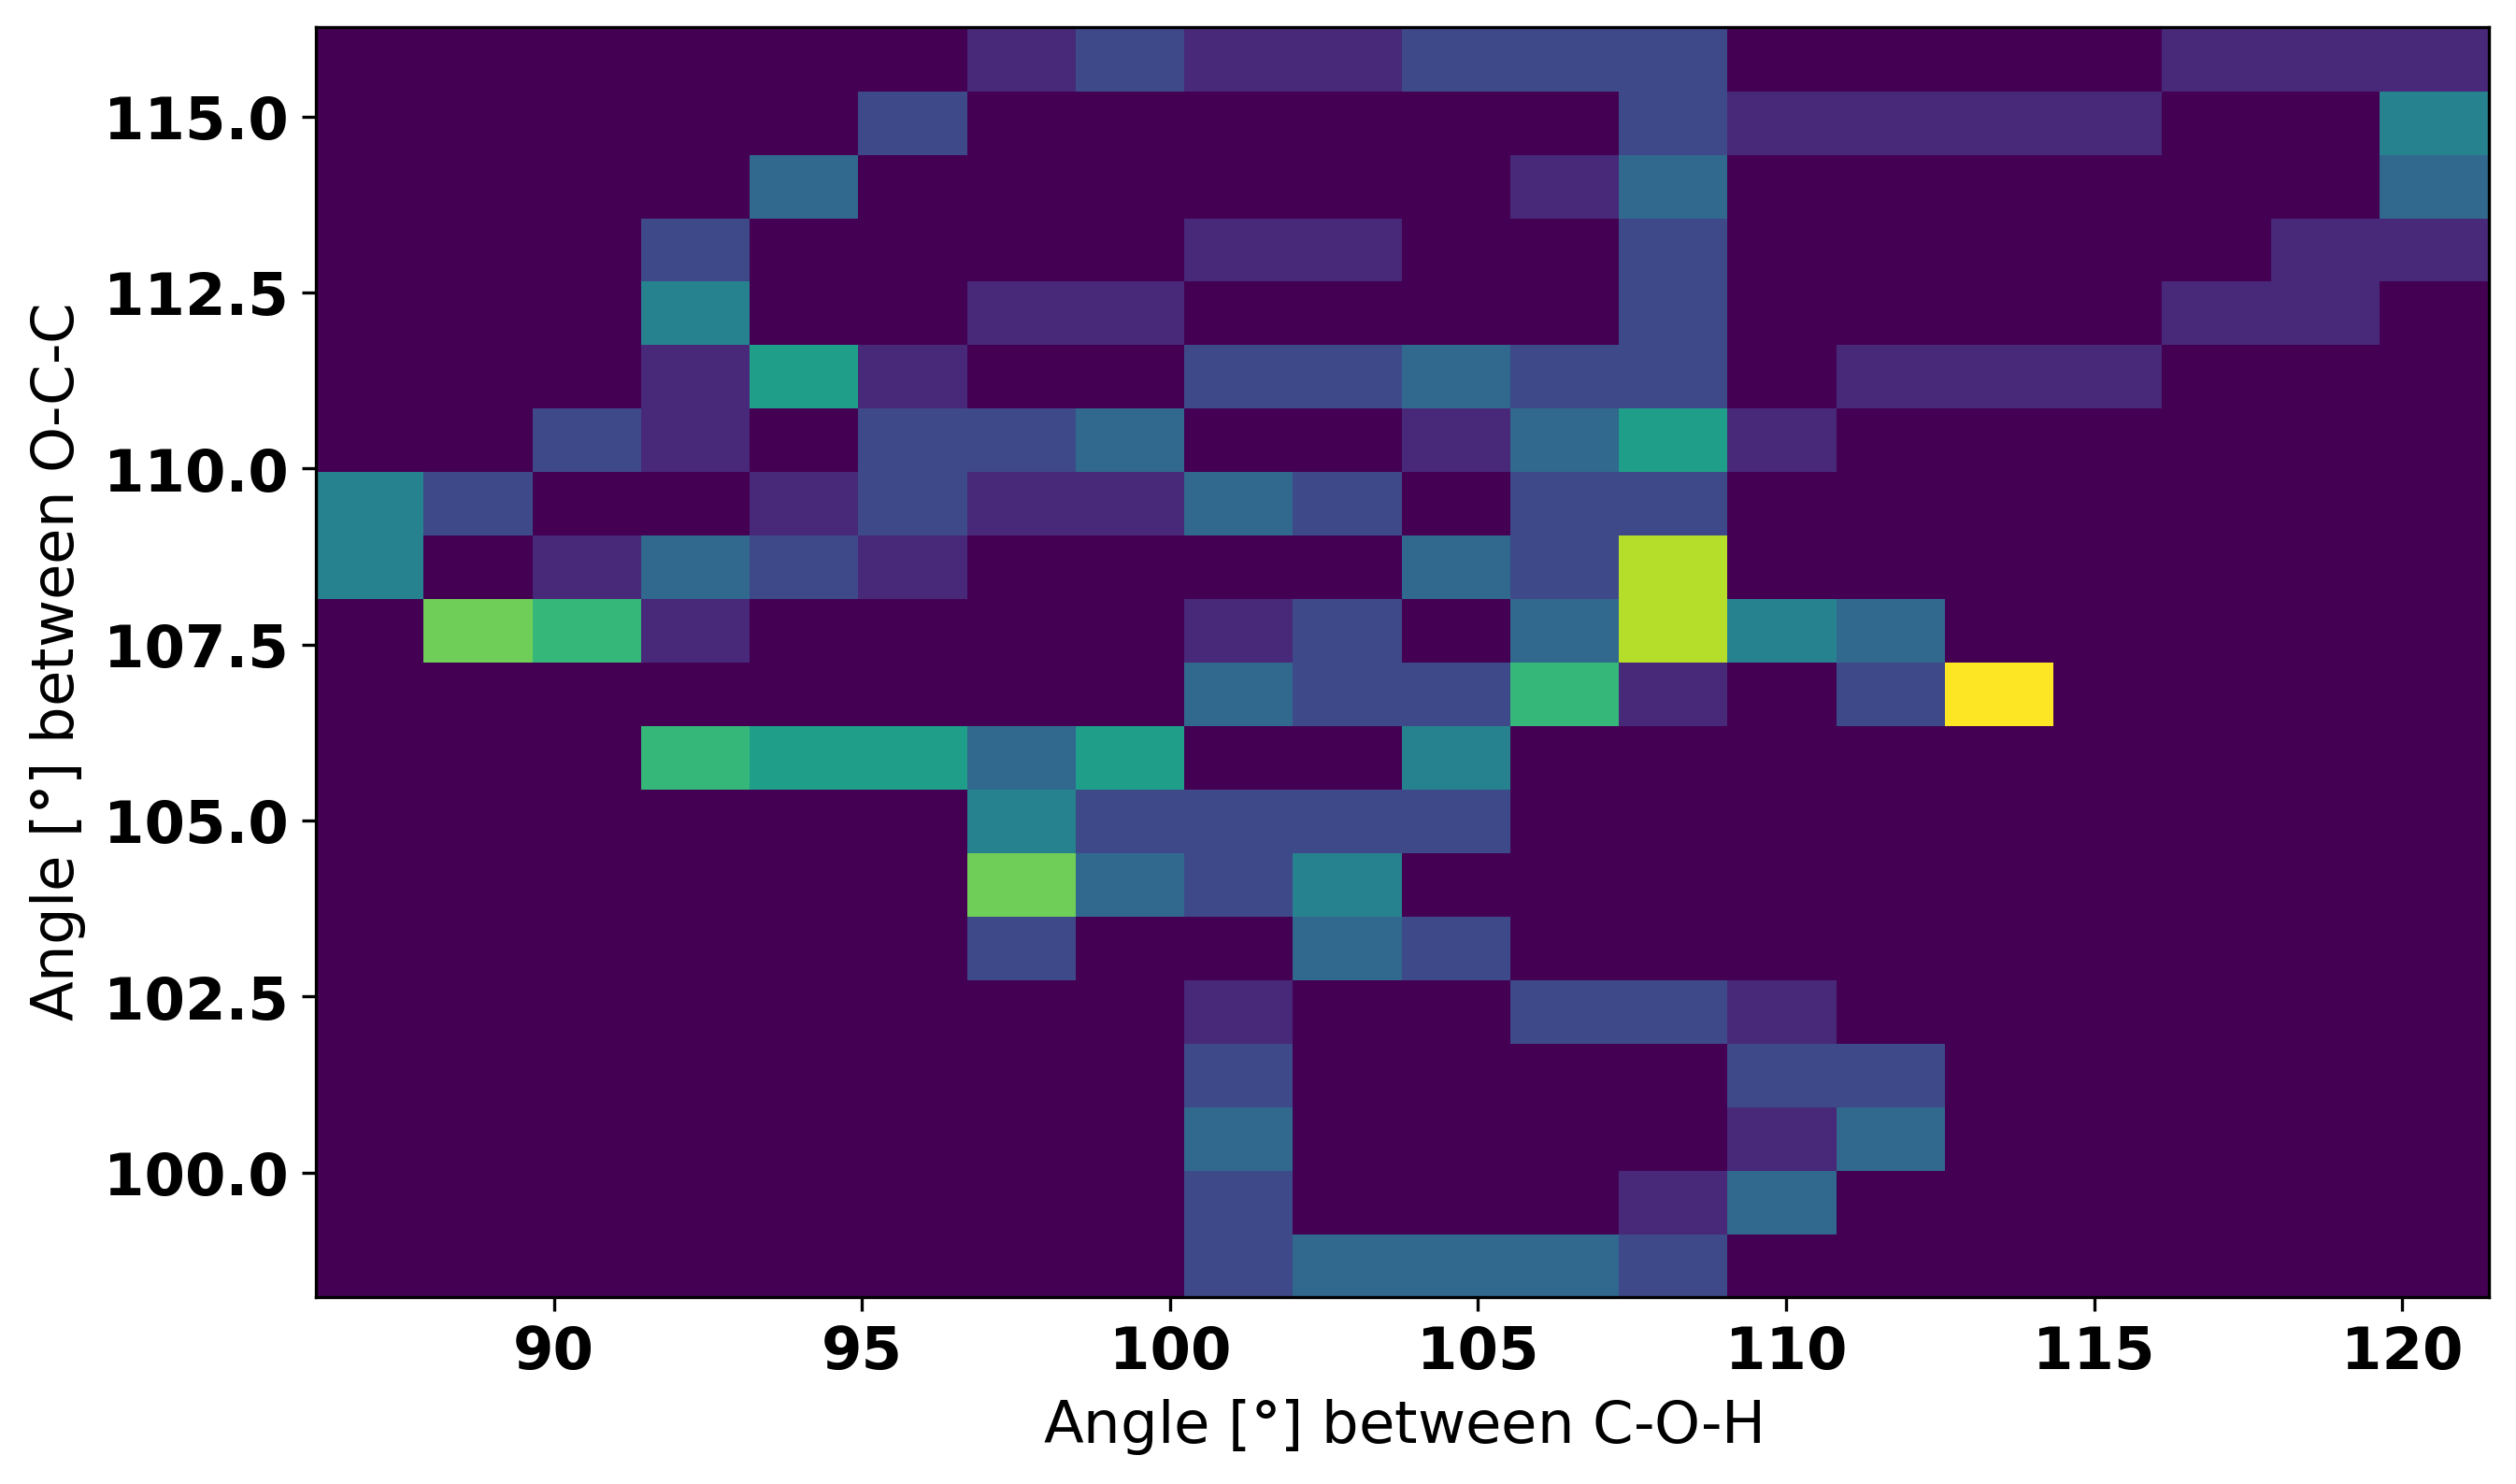

In [30]:
angle1 = get_angles(mol_for, *indices)
angle2 = get_angles(mol_for, 0, 1, 2)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist2d(angle1, angle2, bins=20)
ax.set_xlabel("Angle [$\degree$] between C-O-H")
ax.set_ylabel("Angle [$\degree$] between O-C-C")
plt.minorticks_off()
plt.show()

# Dihedral angles

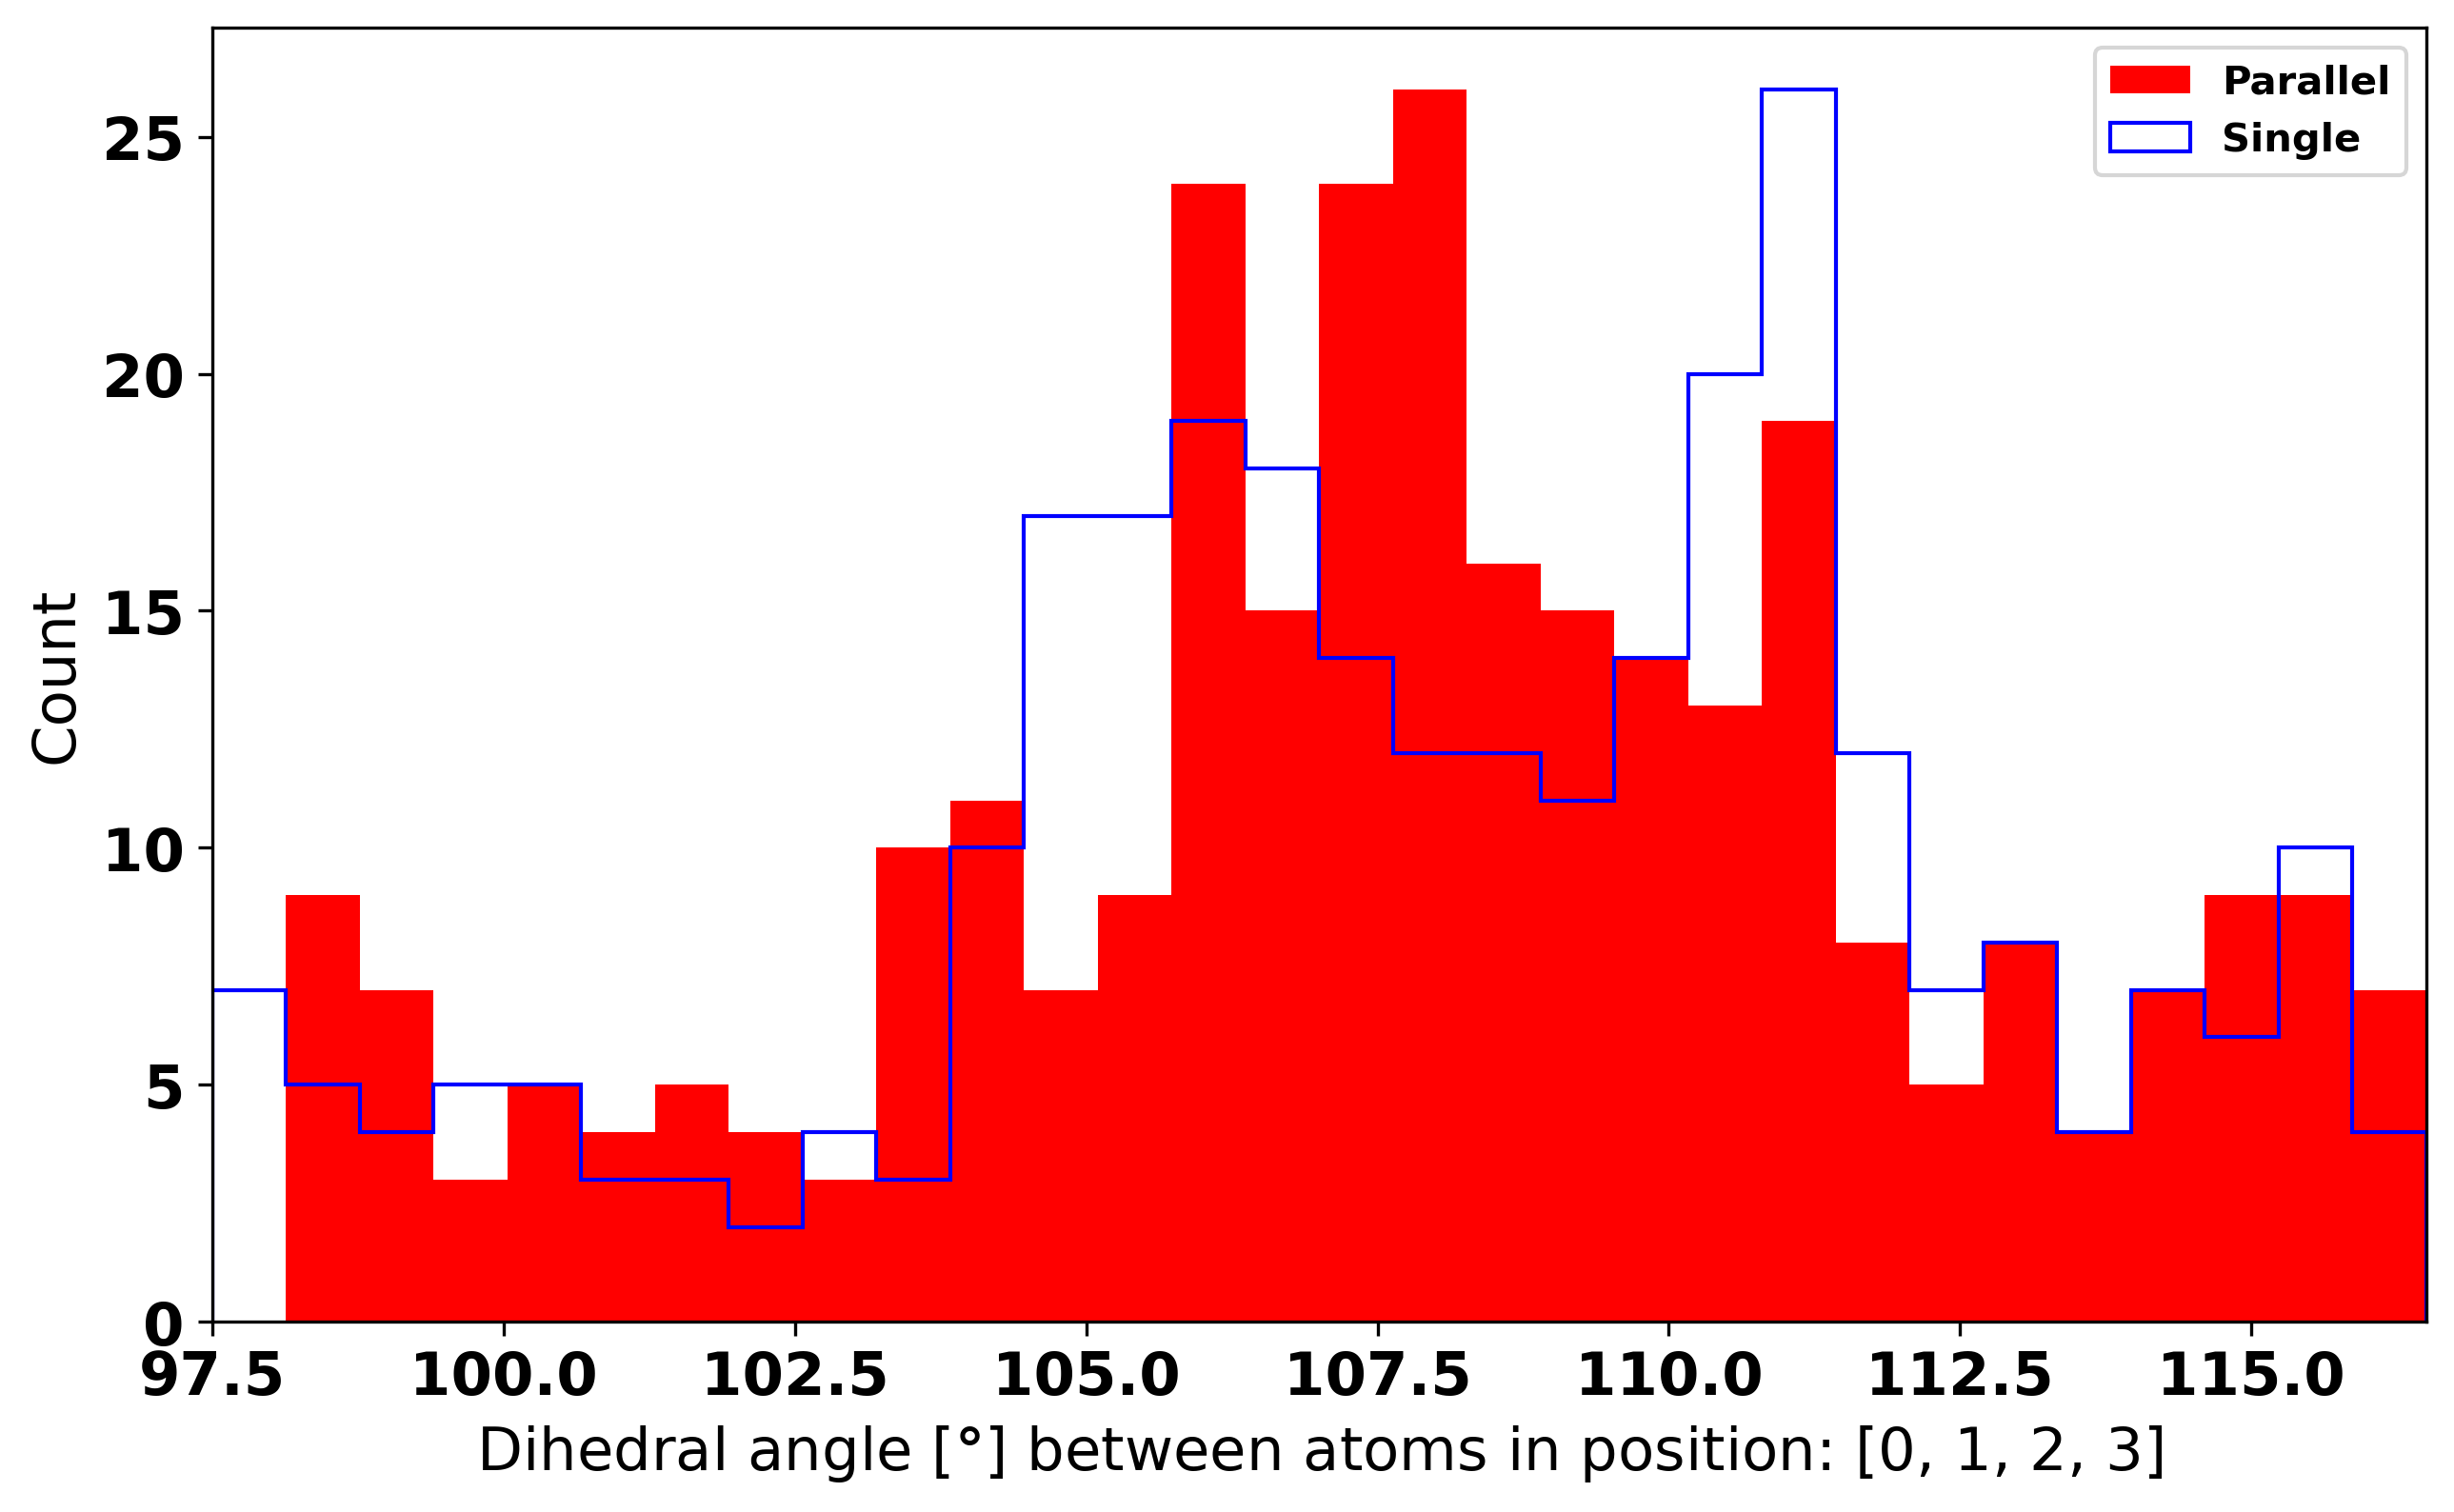

In [5]:
def get_dihedral(mol, a1, a2, a3, a4):
    dihedral = []
    for atom in mol:
        dihedral.append(atom.get_angle(a1, a2, a3, a4))
    return dihedral

N_bins = 30
range = (97.5, 116.5)
indices = [0, 1, 2, 3]
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(get_dihedral(mol_for, *indices), bins=N_bins, range=range, label="Parallel", histtype="stepfilled", color="r")
ax.hist(get_dihedral(mol_single, *indices), bins=N_bins, range=range, label="Single", histtype="step", color="b")
ax.set_xlim(range)
ax.set_xlabel("Dihedral angle [$\degree$] between atoms in position: "+str(indices))
ax.set_ylabel("Count")
plt.minorticks_off()
plt.legend()
plt.show()

# Visualisation

In [26]:
from ase.visualize import view
view(mol_for[:], data="charge density")
